# Conditional Graph

---


## Graph 1


In [1]:
from typing import TypedDict


class AgentState(TypedDict):
    number_1: int
    operation: str
    number_2: int
    final_number: int

In [2]:
def adder(state: AgentState) -> AgentState:
    """This node add the 2 numbers"""

    state["final_number"] = state["number_1"] + state["number_2"]
    return state


def subtractor(state: AgentState) -> AgentState:
    """This node subtract the 2 numbers"""

    state["final_number"] = state["number_1"] - state["number_2"]
    return state


def decide_next_node(state: AgentState) -> str:
    """This node will select the next phase of the graph"""

    if state["operation"] == "+":
        return "addition_operation"
    if state["operation"] == "-":
        return "subtraction_operation"
    raise ValueError(
        f"Operation provided is wrong, operation provided: {state["operation"]}, acceptable operations: [+, *]"
    )

In [3]:
from langgraph.graph import StateGraph, START, END

graph = StateGraph(AgentState)

# Add nodes to the graph
graph.add_node("add_node", adder)
graph.add_node("subtract_node", subtractor)
graph.add_node("decide_next_node", lambda state: state)

# Add edges to the node
graph.add_edge(START, "decide_next_node")
graph.add_conditional_edges(
    "decide_next_node",
    decide_next_node,
    {
        "addition_operation": "add_node",
        "subtraction_operation": "subtract_node",
    },
)
graph.add_edge("add_node", END)
graph.add_edge("subtract_node", END)

# Compile the graph
app = graph.compile()

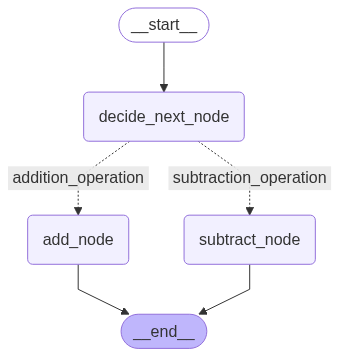

In [4]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [5]:
initial_state_1 = AgentState(number_1=20, operation="+", number_2=10)
result = app.invoke(initial_state_1)
result

{'number_1': 20, 'operation': '+', 'number_2': 10, 'final_number': 30}

In [6]:
initial_state_2 = AgentState(number_1=20, operation="-", number_2=10)
result = app.invoke(initial_state_2)
result

{'number_1': 20, 'operation': '-', 'number_2': 10, 'final_number': 10}

## Graph 2


In [7]:
from typing import TypedDict


class AgentState(TypedDict):
    number_1: int
    number_2: int
    number_3: int
    number_4: int
    operation_1: str
    operation_2: str
    final_number_1: int
    final_number_2: int

In [8]:
def adder_1(state: AgentState) -> AgentState:
    """This node add the 2 numbers"""

    state["final_number_1"] = state["number_1"] + state["number_2"]
    return state


def subtractor_1(state: AgentState) -> AgentState:
    """This node subtracts the 2 numbers"""

    state["final_number_1"] = state["number_1"] - state["number_2"]
    return state


def adder_2(state: AgentState) -> AgentState:
    """This node add the 2 numbers"""

    state["final_number_2"] = state["number_3"] + state["number_4"]
    return state


def subtractor_2(state: AgentState) -> AgentState:
    """This node subtracts the 2 numbers"""

    state["final_number_2"] = state["number_3"] - state["number_4"]
    return state


def decide_next_node_1(state: AgentState) -> str:
    """This node will select the next phase of the graph"""

    if state["operation_1"] == "+":
        return "addition_operation_1"
    if state["operation_1"] == "-":
        return "subtraction_operation_1"
    raise ValueError(
        f"Operation provided is wrong, operation provided: {state["operation_1"]}, acceptable operations: [+, *]"
    )


def decide_next_node_2(state: AgentState) -> str:
    """This node will select the next phase of the graph"""

    if state["operation_2"] == "+":
        return "addition_operation_2"
    if state["operation_2"] == "-":
        return "subtraction_operation_2"
    raise ValueError(
        f"Operation provided is wrong, operation provided: {state["operation_2"]}, acceptable operations: [+, *]"
    )

In [13]:
from langgraph.graph import StateGraph, START, END

graph = StateGraph(AgentState)

# Add nodes to the graph
graph.add_node("add_node_1", adder_1)
graph.add_node("subtract_node_1", subtractor_1)
graph.add_node("decide_next_node_1", lambda state: state)
graph.add_node("add_node_2", adder_2)
graph.add_node("subtract_node_2", subtractor_2)
graph.add_node("decide_next_node_2", lambda state: state)

# Add edges to the graph
graph.add_edge(START, "decide_next_node_1")
graph.add_conditional_edges(
    "decide_next_node_1",
    decide_next_node_1,
    {
        "addition_operation_1": "add_node_1",
        "subtraction_operation_1": "subtract_node_1",
    },
)
graph.add_edge("add_node_1", "decide_next_node_2")
graph.add_edge("subtract_node_1", "decide_next_node_2")
graph.add_conditional_edges(
    "decide_next_node_2",
    decide_next_node_2,
    {
        "addition_operation_2": "add_node_2",
        "subtraction_operation_2": "subtract_node_2",
    },
)
graph.add_edge("add_node_2", END)
graph.add_edge("subtract_node_2", END)

# Compile the graph
app = graph.compile()

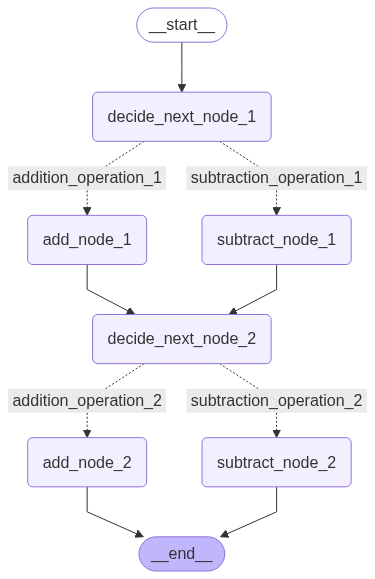

In [14]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [15]:
initial_state = AgentState(number_1=40, number_2=30, number_3=20, number_4=10, operation_1="+", operation_2="-")
result = app.invoke(initial_state)
result

{'number_1': 40,
 'number_2': 30,
 'number_3': 20,
 'number_4': 10,
 'operation_1': '+',
 'operation_2': '-',
 'final_number_1': 70,
 'final_number_2': 10}